# Problem Statment
###  Identify the characteristics of the target audience for each type of treadmill offered by the AeroFit, to provide a better recommendation of the treadmills to the new customers. 
### Investigate whether there are differences across the product with respect to customer characteristics.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.contingency import margins

In [161]:
df = pd.read_csv('aerofit_treadmill.txt')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [163]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,KP281,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


In [164]:
len(df)

180

In [165]:
df.shape

(180, 9)

In [166]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [167]:
df['Gender'].nunique()

2

In [168]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [169]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [170]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [171]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


<AxesSubplot:xlabel='Gender', ylabel='Income'>

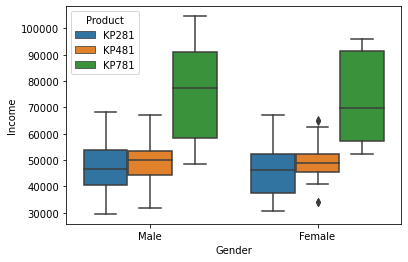

In [172]:
sns.boxplot(x = 'Gender',y = 'Income', data = df ,hue = 'Product' )

<AxesSubplot:xlabel='MaritalStatus', ylabel='Income'>

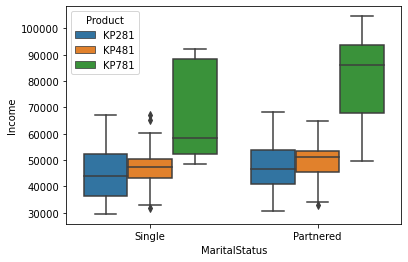

In [173]:
sns.boxplot(x = 'MaritalStatus',y = 'Income', data = df ,hue = 'Product' )

<AxesSubplot:xlabel='MaritalStatus', ylabel='Miles'>

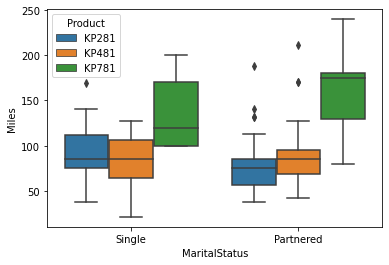

In [187]:
sns.boxplot(x = 'MaritalStatus',y = 'Miles', data = df ,hue = 'Product' )

<AxesSubplot:xlabel='Product', ylabel='count'>

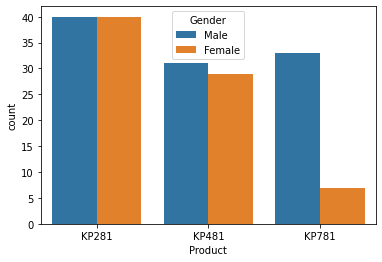

In [174]:
sns.countplot(x = 'Product', data = df, hue = 'Gender')

<AxesSubplot:xlabel='Product', ylabel='Education'>

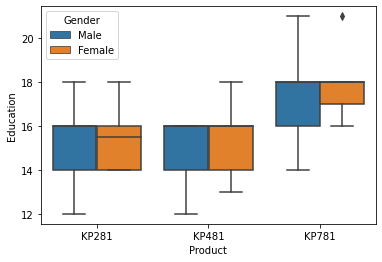

In [175]:
sns.boxplot(x = 'Product', y = 'Education', data = df, hue = 'Gender')

<AxesSubplot:xlabel='Product', ylabel='Age'>

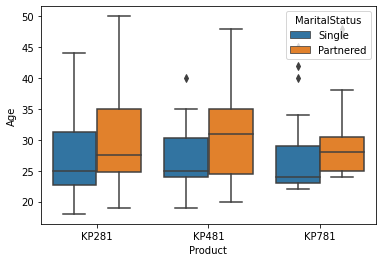

In [176]:
sns.boxplot(x= 'Product', y= "Age", data=df, hue='MaritalStatus')

<AxesSubplot:xlabel='MaritalStatus', ylabel='Age'>

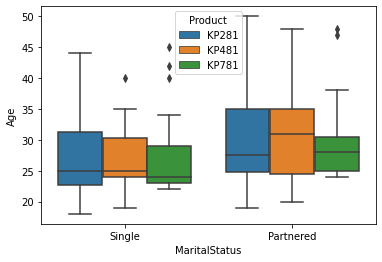

In [177]:
sns.boxplot(x= 'MaritalStatus', y= "Age", data=df, hue='Product')

## Removing Outliers

In [178]:
def remove_outlier_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    iqr = Q3 - Q1
    
    df_final = df[~((df < (Q1 - 1.5*iqr)) | (df > (Q3+1.5*iqr)))]
    return df_final

In [179]:
df_outlier_removed=remove_outlier_iqr(df.Age)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final
    




In [180]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
173,KP781,35,Male,16,Partnered,4,5,92131,360
174,KP781,38,Male,18,Partnered,5,5,104581,150
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200


In [181]:
df_final

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
173,KP781,35,Male,16,Partnered,4,5,92131,360
174,KP781,38,Male,18,Partnered,5,5,104581,150
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200


<AxesSubplot:xlabel='MaritalStatus', ylabel='Age'>

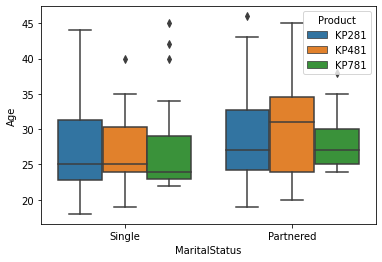

In [182]:
sns.boxplot(x= 'MaritalStatus', y= "Age", data=df_final, hue='Product')

In [183]:
ind_diff

Int64Index([78, 79, 139, 178, 179], dtype='int64')

In [184]:
len(ind_diff)

5

### Removing Outlier from Income column

<AxesSubplot:xlabel='MaritalStatus', ylabel='Income'>

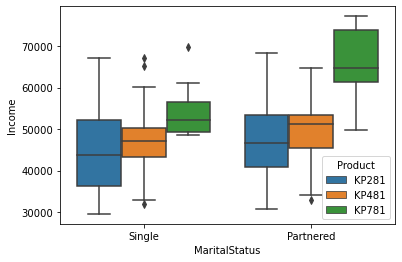

In [185]:
df_outlier_removed=remove_outlier_iqr(df.Income)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final
sns.boxplot(x= 'MaritalStatus', y= "Income", data=df_final, hue='Product')

In [186]:
len(ind_diff)

17

In [ ]:
### Removing Outlier from Miles column

<AxesSubplot:xlabel='MaritalStatus', ylabel='Income'>

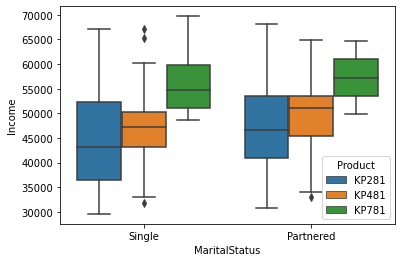

In [189]:
df_outlier_removed=remove_outlier_iqr(df.Miles)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final
sns.boxplot(x= 'MaritalStatus', y= "Income", data=df_final, hue='Product')

In [190]:
len(ind_diff)

2

In [191]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
146,KP781,24,Male,16,Single,4,5,61006,100
147,KP781,24,Male,18,Partnered,4,5,57271,80
150,KP781,25,Male,16,Partnered,4,5,49801,120
153,KP781,25,Male,18,Partnered,4,3,64741,100


<AxesSubplot:xlabel='Age', ylabel='Count'>

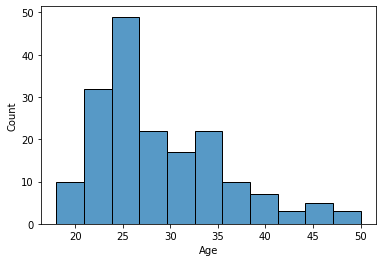

In [41]:
sns.histplot(x= "Age", data=df)

In [65]:
df.Age.mean()

28.788888888888888

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

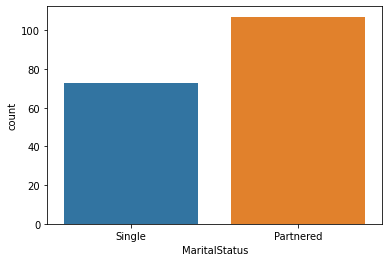

In [42]:
sns.countplot(x= "MaritalStatus", data= df)

<AxesSubplot:xlabel='Product', ylabel='count'>

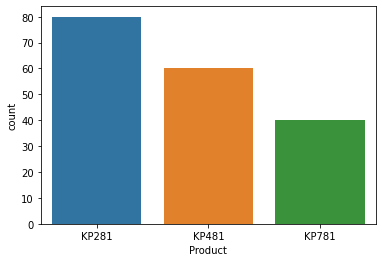

In [43]:
sns.countplot(x= 'Product', data= df)

<AxesSubplot:xlabel='Gender', ylabel='Usage'>

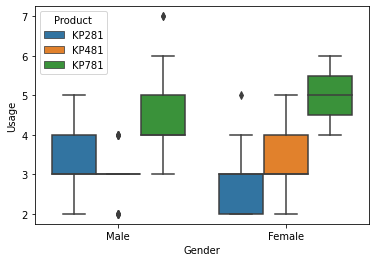

In [51]:
sns.boxplot(x = 'Gender', y = 'Usage', data = df, hue = 'Product')

<AxesSubplot:xlabel='Gender', ylabel='Fitness'>

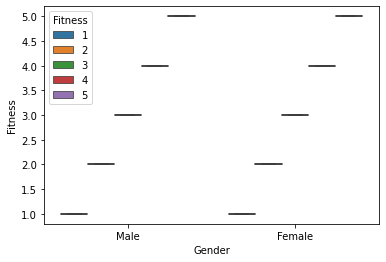

In [16]:
sns.boxplot(x = 'Gender', y = 'Fitness', data = df, hue = 'Fitness')

<AxesSubplot:xlabel='Product', ylabel='Miles'>

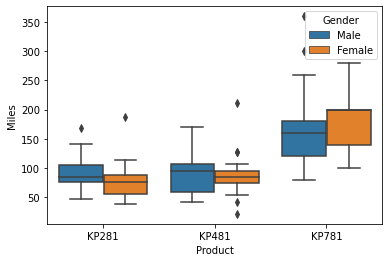

In [17]:
sns.boxplot(x = 'Product', y = 'Miles', data = df, hue = 'Gender')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

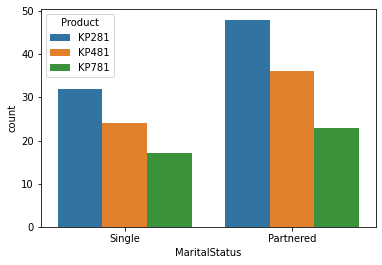

In [18]:
sns.countplot(x = 'MaritalStatus', data = df, hue = 'Product')

<AxesSubplot:xlabel='Product', ylabel='count'>

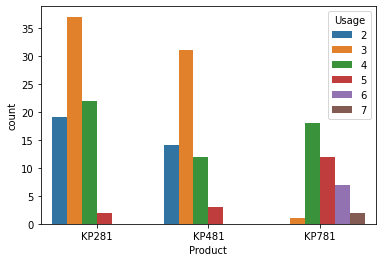

In [19]:
sns.countplot(x = 'Product', data = df, hue = 'Usage')

<AxesSubplot:xlabel='Product', ylabel='count'>

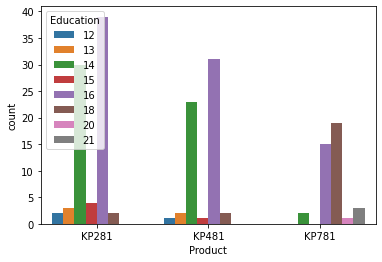

In [20]:
sns.countplot(x = 'Product', data = df, hue = 'Education')

<AxesSubplot:xlabel='Product', ylabel='count'>

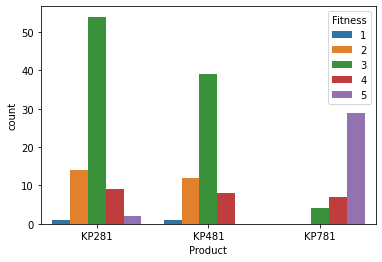

In [21]:
sns.countplot(x = 'Product', data = df, hue = 'Fitness')

<AxesSubplot:xlabel='Income', ylabel='Count'>

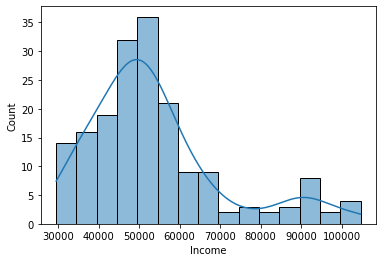

In [22]:
sns.histplot(x = 'Income', data = df, kde = True)

<AxesSubplot:xlabel='Fitness', ylabel='Count'>

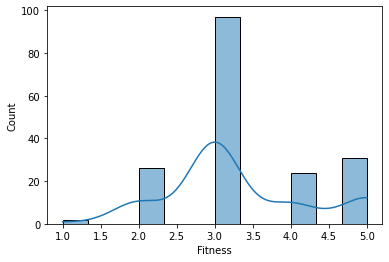

In [23]:
sns.histplot(x = 'Fitness', data = df, kde = True)

<AxesSubplot:xlabel='Education', ylabel='Count'>

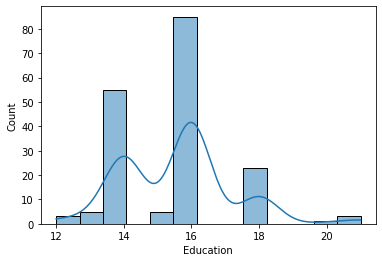

In [24]:
sns.histplot(x = 'Education', data = df, kde = True)

<AxesSubplot:xlabel='Education', ylabel='Count'>

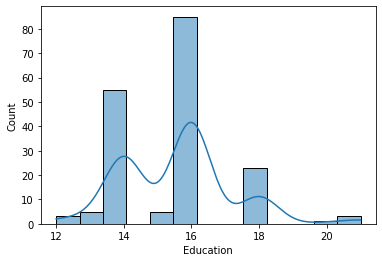

In [25]:
sns.histplot(x = 'Education', data = df, kde = True)

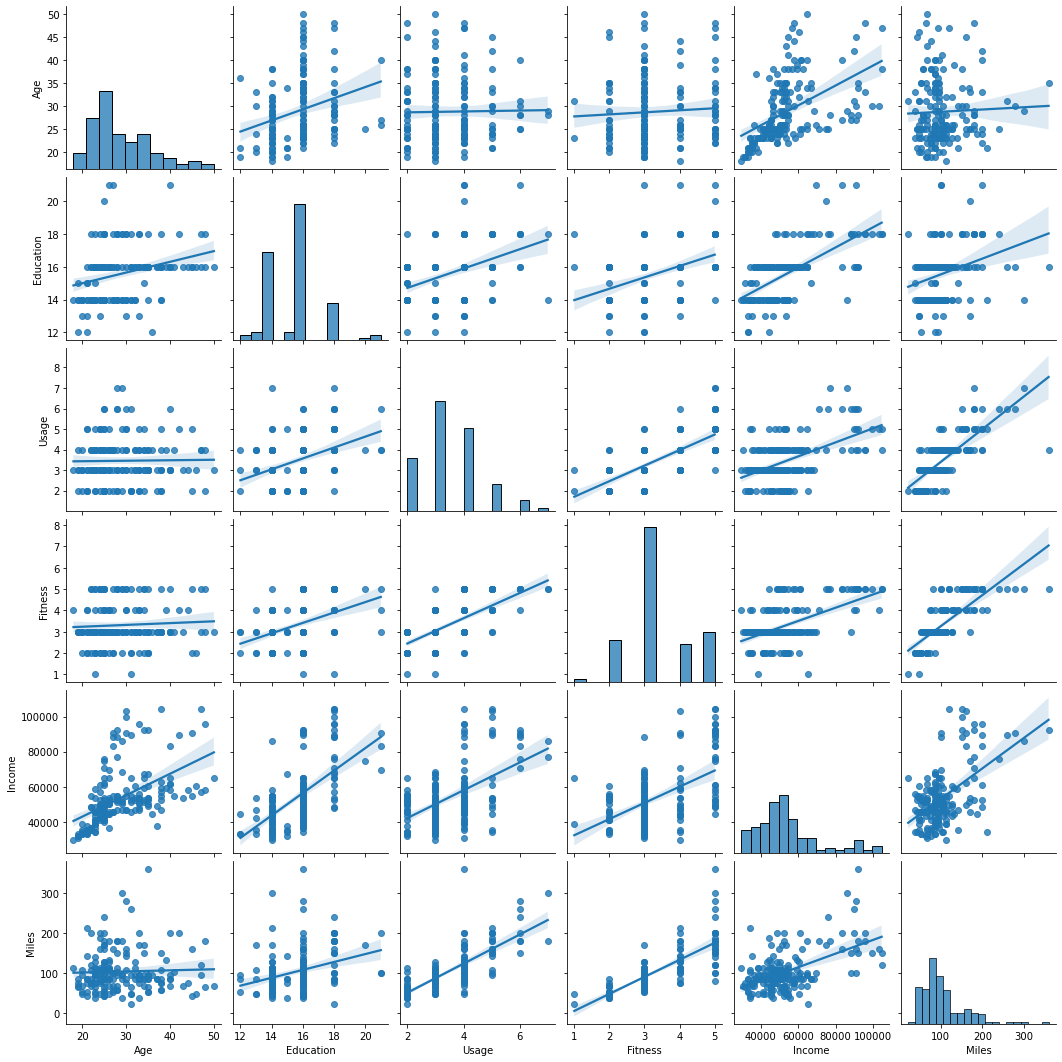

In [26]:
sns.pairplot(data = df, kind = 'reg')

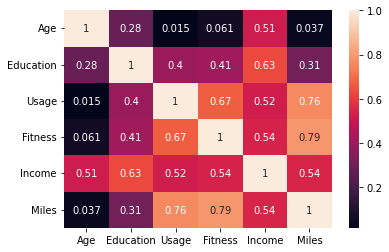

In [34]:
sns.heatmap(data = df.corr(), annot= True)
plt.show()

### Marginal Probability
#### What percent of customers have purchased KP281, KP481, or KP781 in a table?
#### Two way contengency table

In [192]:


pd.crosstab(df.Product, df.Gender)

Gender,Female,Male
Product,,
KP281,38,38
KP481,28,28
KP781,2,8


In [193]:

pd.crosstab(df.Product, df.Gender, normalize = 'columns')*100

Gender,Female,Male
Product,,
KP281,55.882353,51.351351
KP481,41.176471,37.837838
KP781,2.941176,10.810811


In [194]:
df['Gender'].value_counts()

Male      74
Female    68
Name: Gender, dtype: int64

In [199]:
df['Product'].value_counts()

KP281    76
KP481    56
KP781    10
Name: Product, dtype: int64

In [200]:
df['Age'].value_counts()

25    19
23    18
26    11
24     9
35     7
33     6
21     6
22     6
38     6
28     6
20     5
31     5
32     4
34     4
29     4
19     4
30     4
27     4
40     4
37     2
43     1
46     1
44     1
18     1
41     1
39     1
36     1
45     1
Name: Age, dtype: int64

In [201]:
df['Education'].value_counts()

16    70
14    52
18     7
15     5
13     4
12     3
21     1
Name: Education, dtype: int64

In [202]:
df['MaritalStatus'].value_counts()

Partnered    80
Single       62
Name: MaritalStatus, dtype: int64

In [204]:
df['Usage'].value_counts()

3    68
4    38
2    32
5     4
Name: Usage, dtype: int64

In [203]:
df['Fitness'].value_counts()

3    92
2    26
4    16
5     6
1     2
Name: Fitness, dtype: int64

In [205]:
df['Income'].value_counts()

45480    13
52302     9
46617     8
54576     8
53439     7
50028     7
40932     6
51165     6
48891     5
38658     5
35247     5
32973     5
43206     5
34110     4
36384     4
60261     3
59124     3
44343     3
57987     3
64809     2
42069     2
39795     2
31836     2
37521     2
67083     2
47754     2
61398     2
61006     1
48556     1
29562     1
57271     1
49801     1
58516     1
64741     1
53536     1
68220     1
54781     1
48658     1
62535     1
65220     1
56850     1
55713     1
30699     1
69721     1
Name: Income, dtype: int64

In [206]:
df['Miles'].value_counts()

85     27
95     12
75     10
66      9
47      9
106     9
113     8
94      7
53      7
56      6
100     5
127     5
64      5
42      4
38      3
103     3
74      3
132     2
141     2
120     2
140     1
112     1
21      1
80      1
Name: Miles, dtype: int64

In [31]:
pd.DataFrame(df.value_counts())

0
Product Age Gender Education MaritalStatus Usage Fitness Income Miles   
KP281   18  Male   14        Single        3     4       29562  112    1
KP481   30  Female 13        Single        4     3       46617  106    1
        31  Female 16        Partnered     2     3       51165  64     1
                   18        Single        2     1       65220  21     1
            Male   16        Partnered     3     3       52302  95     1
...                                                                   ..
KP281   34  Female 16        Single        2     2       52302  66     1
            Male   16        Single        4     5       51165  169    1
        35  Female 16        Partnered     3     3       60261  94     1
                   18        Single        3     3       67083  85     1
KP781   48  Male   18        Partnered     4     5       95508  180    1

[180 rows x 1 columns]

#### What is the probability of a male customer buying a KP781 treadmill?


In [50]:
pd.crosstab(df.Gender, df.Product, normalize= "index")*100

# Male has 31.7% chance of buying KP781

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769


#### What is the probability of a female customer buying a KP781 treadmill?
9.2%

#### What is the probability of a female customer buying a KP281 treadmill?
52.6%

In [213]:
pd.crosstab(df.Product, df.Age)

Age,18,19,20,21,22,23,24,25,26,27,...,36,37,38,39,40,41,43,44,45,46
Product,,,,,,,,,,,,,,,,,,,,,
KP281,1,3,2,4,4,8,4,7,7,3,...,1,1,4,1,1,1,1,1,0,1
KP481,0,1,3,2,0,7,3,10,3,1,...,0,1,2,0,3,0,0,0,1,0
KP781,0,0,0,0,2,3,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
pd.crosstab(df.Product, df.Age, normalize='columns')

Age,18,19,20,21,22,23,24,25,26,27,...,36,37,38,39,40,41,43,44,45,46
Product,,,,,,,,,,,,,,,,,,,,,
KP281,1.0,0.75,0.4,0.666667,0.666667,0.444444,0.444444,0.368421,0.636364,0.75,...,1.0,0.5,0.666667,1.0,0.25,1.0,1.0,1.0,0.0,1.0
KP481,0.0,0.25,0.6,0.333333,0.000000,0.388889,0.333333,0.526316,0.272727,0.25,...,0.0,0.5,0.333333,0.0,0.75,0.0,0.0,0.0,1.0,0.0
KP781,0.0,0.00,0.0,0.000000,0.333333,0.166667,0.222222,0.105263,0.090909,0.00,...,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [208]:
pd.crosstab(df.Gender, df.MaritalStatus)

MaritalStatus,Partnered,Single
Gender,,
Female,39,29
Male,41,33


In [209]:
pd.crosstab(df.Gender, df.MaritalStatus, normalize= 'index')

MaritalStatus,Partnered,Single
Gender,,
Female,0.573529,0.426471
Male,0.554054,0.445946


In [210]:
pd.crosstab(df.Product, df.MaritalStatus)

MaritalStatus,Partnered,Single
Product,,
KP281,45,31
KP481,32,24
KP781,3,7


In [211]:
pd.crosstab(df.Product, df.MaritalStatus, normalize='columns')

MaritalStatus,Partnered,Single
Product,,
KP281,0.5625,0.500000
KP481,0.4000,0.387097
KP781,0.0375,0.112903


In [212]:

pd.crosstab(df.Product, df.MaritalStatus)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
146,KP781,24,Male,16,Single,4,5,61006,100
147,KP781,24,Male,18,Partnered,4,5,57271,80
150,KP781,25,Male,16,Partnered,4,5,49801,120
153,KP781,25,Male,18,Partnered,4,3,64741,100


In [225]:
pd.crosstab(df.Product, df.Miles)

Miles,21,38,42,47,53,56,64,66,74,75,...,100,103,106,112,113,120,127,132,140,141
Product,,,,,,,,,,,,,,,,,,,,,
KP281,0,3,0,9,0,6,0,9,0,10,...,0,3,0,1,8,0,0,2,0,2
KP481,1,0,4,0,7,0,5,0,3,0,...,0,0,8,0,0,0,5,0,0,0
KP781,0,0,0,0,0,0,0,0,0,0,...,5,0,1,0,0,2,0,0,1,0


In [228]:
pd.crosstab(df.Product, df.Miles, normalize='columns')

Miles,21,38,42,47,53,56,64,66,74,75,...,100,103,106,112,113,120,127,132,140,141
Product,,,,,,,,,,,,,,,,,,,,,
KP281,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.000000,1.0,1.0,0.0,0.0,1.0,0.0,1.0
KP481,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.888889,0.0,0.0,0.0,1.0,0.0,0.0,0.0
KP781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.111111,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [224]:
join_probability_X_Y = np.array(df[['Product', 'Gender']])


x, y = margins(join_probability_X_Y)

print(x.T)


[['KP281Male' 'KP281Male' 'KP281Female' 'KP281Male' 'KP281Male'
  'KP281Female' 'KP281Female' 'KP281Male' 'KP281Male' 'KP281Female'
  'KP281Male' 'KP281Female' 'KP281Female' 'KP281Female' 'KP281Male'
  'KP281Male' 'KP281Female' 'KP281Male' 'KP281Female' 'KP281Female'
  'KP281Male' 'KP281Male' 'KP281Female' 'KP281Male' 'KP281Male'
  'KP281Female' 'KP281Female' 'KP281Male' 'KP281Female' 'KP281Female'
  'KP281Male' 'KP281Female' 'KP281Male' 'KP281Female' 'KP281Female'
  'KP281Male' 'KP281Male' 'KP281Female' 'KP281Male' 'KP281Male'
  'KP281Female' 'KP281Male' 'KP281Female' 'KP281Female' 'KP281Female'
  'KP281Male' 'KP281Female' 'KP281Male' 'KP281Female' 'KP281Male'
  'KP281Female' 'KP281Female' 'KP281Male' 'KP281Male' 'KP281Male'
  'KP281Female' 'KP281Female' 'KP281Male' 'KP281Female' 'KP281Female'
  'KP281Female' 'KP281Male' 'KP281Female' 'KP281Female' 'KP281Male'
  'KP281Female' 'KP281Male' 'KP281Female' 'KP281Male' 'KP281Male'
  'KP281Male' 'KP281Male' 'KP281Male' 'KP281Male' 'KP281Fema

# Insigts & Recommendations


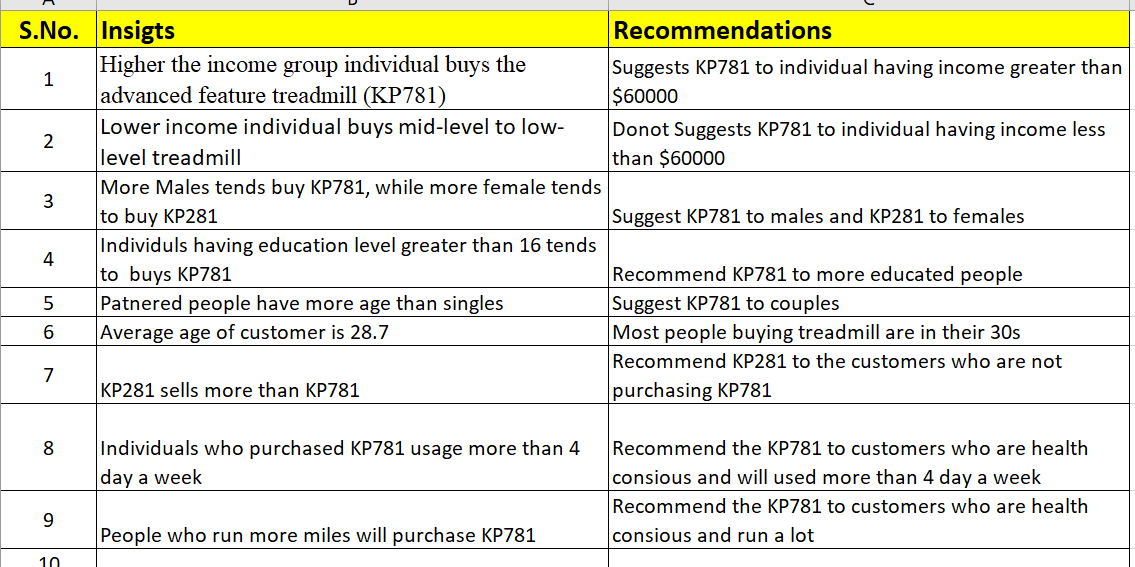

SyntaxError: invalid syntax (1560008344.py, line 1)

image.png

NameError: name 'image' is not defined

In [7]:
np.std([7.07, 7.00, 7.10, 6.97, 7.00, 7.03 , 7.01, 8.02, 7.01, 5.38, 6.98, 7.08, 8.12])**2

0.37671479289940807

In [ ]:
np.std()